In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd

from metadata import metadata

In [4]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', 10)

style.use('ggplot')
plt.rcParams['figure.figsize'] = (50, 10)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
GCI = None

In [5]:
def set_codes(arr):
    if pd.isnull(arr):
        return ['-'] * 6
    else:
        codes = arr.split('.')
        while len(codes) < 6:
            codes.append('-')
        return tuple(codes)

In [6]:
def plot_indicator(id, edition):
    global GCI
    gci = get_gci() if GCI is None else GCI
    indicator = gci[id].xs(edition, level='Edition').dropna()
    column_name = metadata.loc[metadata['id'] == id, 'Series unindented'].iloc[0]
    data = pd.DataFrame(indicator.values, columns=[column_name], index=indicator.index)
    data.plot(kind='bar')
    plt.show()

In [7]:
raw_data = pd.read_csv('../../data/GCI_Dataset_2006-2015.data.csv')

In [8]:
raw_data_2 = raw_data[raw_data.Attribute.isin(['Value'])].drop(
    ['Series', 'Series unindented', 'Placement', 'Dataset', 'Attribute', 'AVG', 'LAC', 'DEVASIA',
     'MENAP', 'SSA', 'CIS', 'CEE', 'ADV', 'LIC', 'LMIC', 'UMIC', 'HICO', 'HICNO', 'ASEAN', 'STAGE1',
     'TRANS1TO2', 'STAGE2', 'TRANS2TO3', 'STAGE3'], axis=1).sort_values(['Edition', 'GLOBAL ID'])

In [9]:
raw_data_2.drop('Series code', axis=1, inplace=True)
raw_data_2 = raw_data_2.merge(metadata[['GLOBAL ID', 'Series type', 'parents', 'id']], on='GLOBAL ID')

In [10]:
raw_data_2 = raw_data_2[raw_data_2['Series type'] == 'Indicator']

In [11]:
raw_data_2['code_1'], raw_data_2['code_2'], raw_data_2['code_3'], raw_data_2['code_4'], \
raw_data_2['code_5'], raw_data_2['code_6'] = zip(*raw_data_2['id'].map(set_codes))

In [12]:
raw_data_3 = pd.melt(raw_data_2.drop(['Series type', 'parents'], axis=1),
                     id_vars=['Edition', 'id', 'GLOBAL ID', 'code_1', 'code_2', 'code_3', 'code_4',
                              'code_5', 'code_6'],
                     var_name='entity')

In [13]:
raw_data_3['value'] = pd.to_numeric(raw_data_3['value'], errors='coerce')

In [14]:
gci = raw_data_3.pivot_table('value', ['entity', 'Edition'],
                             ['id', 'GLOBAL ID', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5', 'code_6'])

In [86]:
def get_indicators(ids, edition):
    ids = [ids] if hasattr(ids, 'upper') else ids
    indicators = gci[ids].xs(edition, level='Edition').dropna()
    column_names = [metadata.loc[metadata['id'] == _id, 'Series unindented'].iloc[0] for _id in ids]
    data = pd.DataFrame(indicators.values, columns=list(column_names), index=indicators.index)
    for col in column_names:
        data[col] = data[col].astype('float128')
    return data

In [84]:
_id = 'GCI.A.02.02.01'
metadata[metadata['id'] == _id]['Series unindented'].iloc[0]

'Quality of electricity supply, 1-7 (best)'

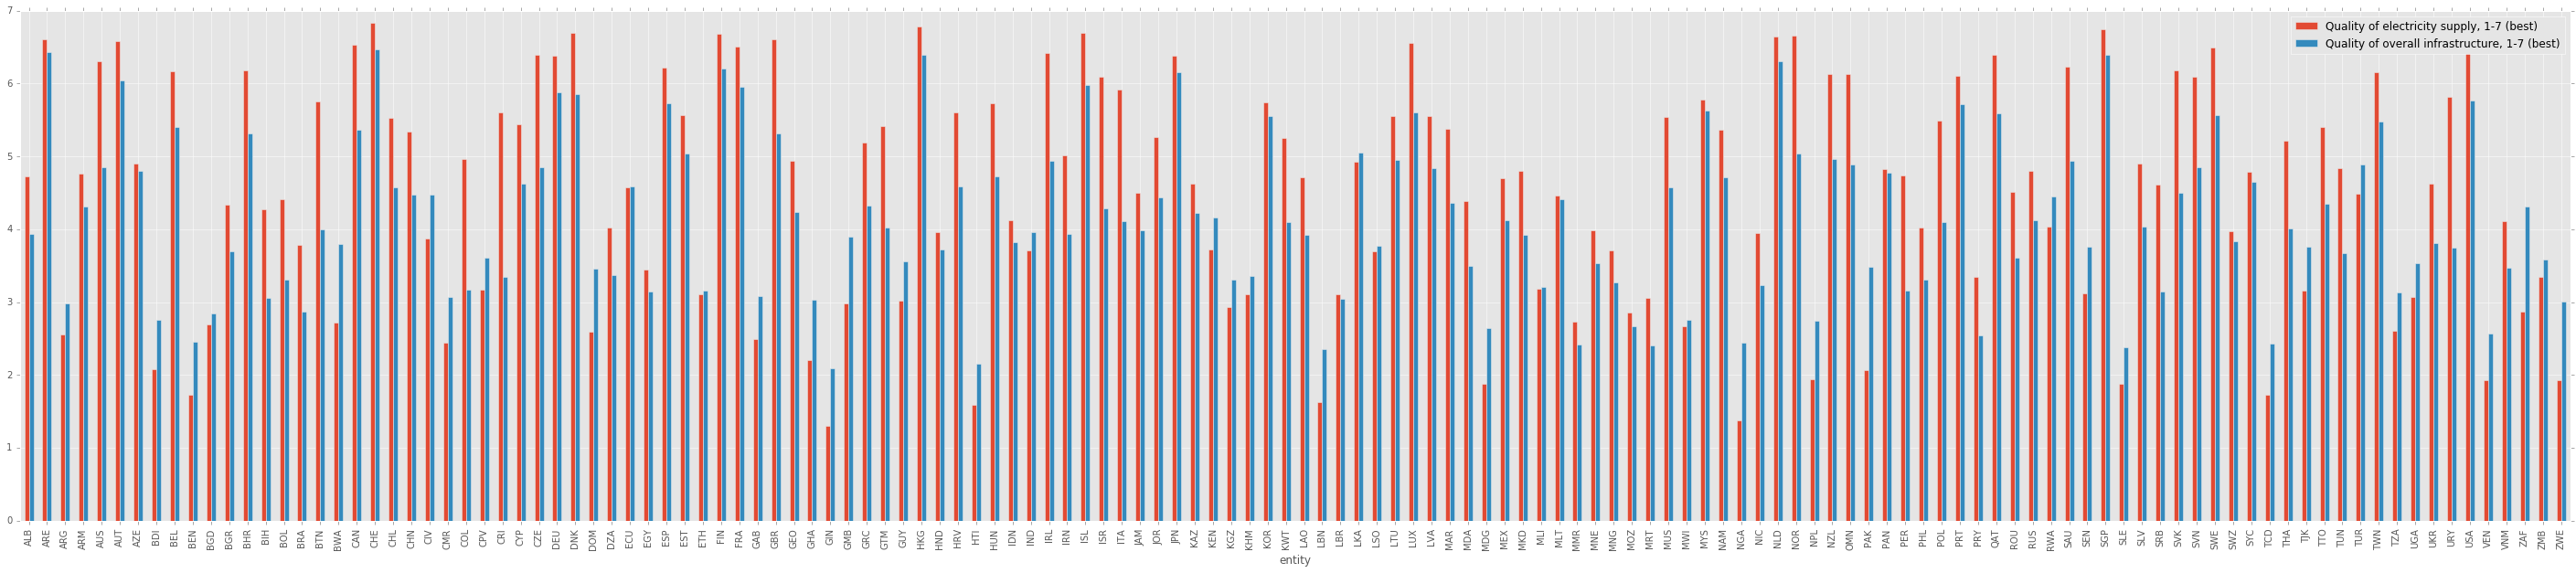

In [91]:
#ids = 'GCI.A.02.02.01'
ids = ['GCI.A.02.02.01', 'GCI.A.02.01.01']
edition = '2015-2016'
ids = [ids] if hasattr(ids, 'upper') else ids
indicators = gci[ids].xs(edition, level='Edition').dropna()
column_names = [metadata[metadata['id'] == _id]['Series unindented'].iloc[0] for _id in ids]
data = pd.DataFrame(indicators.values, columns=list(column_names), index=indicators.index)
for col in column_names:
    data[col] = data[col].astype('float128')
data.plot(kind='bar')
#plt.show()

In [67]:
gci.xs('AIRSEATKM', level='GLOBAL ID', axis=1)

id               GCI.A.02.01.06
code_1                      GCI
code_2                        A
code_3                       02
code_4                       01
code_5                       06
code_6                        -
entity Edition                 
AGO    2006-2007            NaN
       2007-2008            NaN
       2008-2009            NaN
       2009-2010            NaN
       2010-2011      93.350941
       2011-2012     107.714298
       2012-2013            NaN
       2013-2014     117.795856
       2014-2015     130.499916
       2015-2016            NaN
ALB    2006-2007      11.897075
       2007-2008      16.413826
       2008-2009      17.092813
       2009-2010      16.006469
       2010-2011      22.940694
       2011-2012      23.544759
       2012-2013      22.393549
       2013-2014      24.226735
       2014-2015      18.788211
       2015-2016      18.814600
ARE    2006-2007    1465.470024
       2007-2008    1757.899074
       2008-2009    2138.769212
       2009-2010    2572.779042
       2010-2011    2899.506983
       2011-2012    3214.348476
       2012-2013    3633.559999
       2013-2014    4198.946358
       2014-2015    4799.371789
       2015-2016    5458.739204
...                         ...
ZAF    2006-2007     968.086005
       2007-2008    1003.542152
       2008-2009    1081.529107
       2009-2010    1054.661253
       2010-2011    1139.357183
       2011-2012    1152.644500
       2012-2013    1146.333271
       2013-2014    1088.481839
       2014-2015    1116.957630
       2015-2016    1174.713956
ZMB    2006-2007      17.822702
       2007-2008      29.312142
       2008-2009      29.842457
       2009-2010      25.754791
       2010-2011      25.533417
       2011-2012      24.207649
       2012-2013      30.979718
       2013-2014      43.542360
       2014-2015      37.648352
       2015-2016      32.382320
ZWE    2006-2007      25.312283
       2007-2008      21.972446
       2008-2009      17.206841
       2009-2010      20.575226
       2010-2011      22.705256
       2011-2012      20.999068
       2012-2013      15.395604
       2013-2014      12.450990
       2014-2015      18.997056
       2015-2016      21.773437

[1510 rows x 1 columns]

In [ ]:
idx = pd.IndexSlice
gci.loc[slice('AGO'),slice('DZA')]

In [ ]:
gci['GCI.A.01.01.01.01']